In [10]:
import pandas as pd
import matplotlib
from matplotlib import pylab as plt
import pandas as pd
import numpy  as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

df_orig = pd.read_csv('data/studentmat.csv', delimiter = ';')
print(df_orig.head())

print(df_orig.shape)

df_orig.dtypes

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
(395, 33)


school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [11]:
cat_ftrs = ['school','sex','address','Pstatus','famsize','schoolsup','famsup','paid','activities','nursery',
                'Mjob', 'Fjob','reason', 'guardian', 'higher', 'internet', 'romantic']
ordinal_ftrs = ['Medu', 'Fedu', 'health','freetime', 'goout','famrel' 'Dalc', 'Walc', 
                'traveltime','studytime', 'failures'] #already pre processd
num_ftrs = ['age','absences', 'G1', 'G2']
label = ['G3']

In [12]:
df_orig['G3']
df_orig['G3'] = df_orig['G3'].map({0:'<10', 1:'<10', 2:'<10' , 3:'<10', 4:'<10', 5:'<10', 6:'<10', 7:'<10', 
                                   8:'<10',9:'<10',10:'>=10',11:'>=10', 12:'>=10',13:'>=10',14:'>=10',15:'>=10',
                                   16:'>=10',17:'>=10',18:'>=10',19:'>=10', 20:'>=10'}) 
#df_orig['G3'].values[df_orig['G3'] > 10] = ">=10"


In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
class_values = le.fit_transform(df_orig[['G3']])
df_class= pd.DataFrame(class_values)


/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
# read the data


# one-hot encoder
ohe = OneHotEncoder(sparse=False)
cat_values = ohe.fit_transform(df_orig[cat_ftrs])
cat_ftr_names = ohe.get_feature_names(cat_ftrs)
df_cat = pd.DataFrame(data=cat_values,columns = cat_ftr_names)
#df_cat.head()


scaler = StandardScaler()
num_values = scaler.fit_transform(df_orig[num_ftrs])
df_num = pd.DataFrame(data=num_values,columns = num_ftrs)

In [15]:
df_prep = pd.concat([df_cat,df_num],axis=1)

df_prep['Medu'] = df_orig['Medu']
df_prep['Fedu'] = df_orig['Fedu']
df_prep['health'] = df_orig['health']
df_prep['freetime'] = df_orig['freetime']
df_prep['goout'] = df_orig['goout']
df_prep['famrel'] = df_orig['famrel']
df_prep['Dalc'] = df_orig['Dalc']
df_prep['Walc'] = df_orig['Walc']
df_prep['traveltime'] = df_orig['traveltime']
df_prep['studytime'] = df_orig['studytime']
df_prep['failures'] = df_orig['failures']
df_prep['G3'] = df_class

print(df_prep.head())
df_prep.dtypes

   school_GP  school_MS  sex_F  sex_M  address_R  address_U  Pstatus_A  \
0        1.0        0.0    1.0    0.0        0.0        1.0        1.0   
1        1.0        0.0    1.0    0.0        0.0        1.0        0.0   
2        1.0        0.0    1.0    0.0        0.0        1.0        0.0   
3        1.0        0.0    1.0    0.0        0.0        1.0        0.0   
4        1.0        0.0    1.0    0.0        0.0        1.0        0.0   

   Pstatus_T  famsize_GT3  famsize_LE3  ...  health  freetime  goout  famrel  \
0        0.0          1.0          0.0  ...       3         3      4       4   
1        1.0          1.0          0.0  ...       3         3      3       5   
2        1.0          0.0          1.0  ...       3         3      2       4   
3        1.0          1.0          0.0  ...       5         2      2       3   
4        1.0          1.0          0.0  ...       5         3      2       4   

   Dalc  Walc  traveltime  studytime  failures  G3  
0     1     1        

school_GP            float64
school_MS            float64
sex_F                float64
sex_M                float64
address_R            float64
address_U            float64
Pstatus_A            float64
Pstatus_T            float64
famsize_GT3          float64
famsize_LE3          float64
schoolsup_no         float64
schoolsup_yes        float64
famsup_no            float64
famsup_yes           float64
paid_no              float64
paid_yes             float64
activities_no        float64
activities_yes       float64
nursery_no           float64
nursery_yes          float64
Mjob_at_home         float64
Mjob_health          float64
Mjob_other           float64
Mjob_services        float64
Mjob_teacher         float64
Fjob_at_home         float64
Fjob_health          float64
Fjob_other           float64
Fjob_services        float64
Fjob_teacher         float64
reason_course        float64
reason_home          float64
reason_other         float64
reason_reputation    float64
guardian_fathe

In [16]:
#Balance - label categorical 
print(df_prep['G3'].value_counts()/df_prep['G3'].shape)


1    0.670886
0    0.329114
Name: G3, dtype: float64


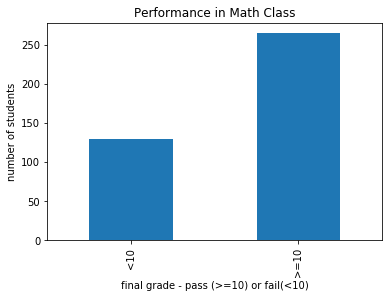

<Figure size 432x288 with 0 Axes>

In [17]:
#Bar plot - label categorical 
pd.value_counts(df_orig['G3'], sort= False).plot.bar() #normalize = True gives fraction of points

plt.ylabel('number of students')
plt.title('Performance in Math Class')
plt.xlabel('final grade - pass (>=10) or fail(<10)')
plt.show()
plt.savefig('figures/balanced1.png',dpi=300)

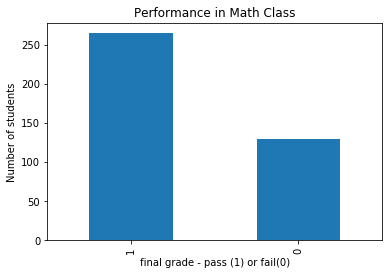

In [18]:
#Bar plot - label categorical pre processed
pd.value_counts(df_prep['G3'], sort= True).plot.bar() #normalize = True gives fraction of points

plt.ylabel('Number of students')
plt.title('Performance in Math Class')
plt.xlabel('final grade - pass (1) or fail(0)')
plt.savefig('figures/balancedd.png',dpi=300)
plt.show()

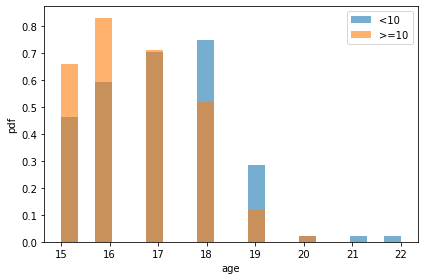

In [19]:
#histo of age
import matplotlib
from matplotlib import pylab as plt

categories = df_orig['G3'].unique()
bin_range = (df_orig['age'].min(),df_orig['age'].max())

for c in categories:
    plt.hist(df_orig[df_orig['G3']==c]['age'],alpha=0.6,label=c,range=bin_range,bins=20,density=True) #alpha adjusts transparency
plt.legend()
plt.ylabel('pdf')
plt.xlabel('age')
plt.tight_layout()
#plt.savefig('figures/histo.png',dpi=300)
plt.show()

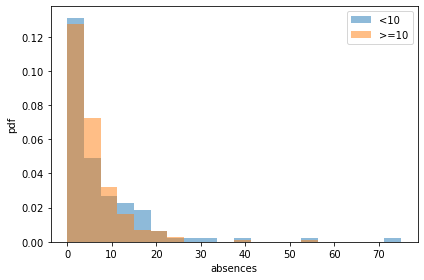

In [20]:
#histo of absences
import matplotlib
from matplotlib import pylab as plt

categories = df_orig['G3'].unique()
bin_range = (df_orig['absences'].min(),df_orig['absences'].max())

for c in categories:
    plt.hist(df_orig[df_orig['G3']==c]['absences'],alpha=0.5,label=c,range=bin_range,bins=20,density=True) #alpha adjusts transparency
plt.legend()
plt.ylabel('pdf')
plt.xlabel('absences')
plt.tight_layout()
plt.savefig('figures/histo.png',dpi=300)
plt.show()


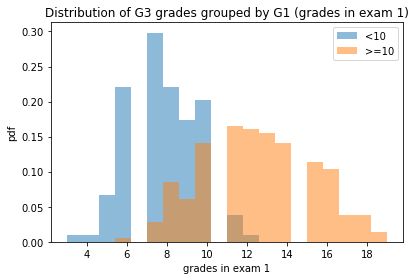

In [21]:
#histo of absences
import matplotlib
from matplotlib import pylab as plt

categories = df_orig['G3'].unique()
bin_range = (df_orig['G1'].min(),df_orig['G1'].max())

for c in categories:
    plt.hist(df_orig[df_orig['G3']==c]['G1'],alpha=0.5,label=c,range=bin_range,bins=20,density=True) #alpha adjusts transparency
plt.legend()
plt.title('Distribution of G3 grades grouped by G1 (grades in exam 1)')
plt.ylabel('pdf')
plt.xlabel('grades in exam 1')
plt.tight_layout()
plt.savefig('figures/G1_HISTO.png',dpi=300)
plt.show()


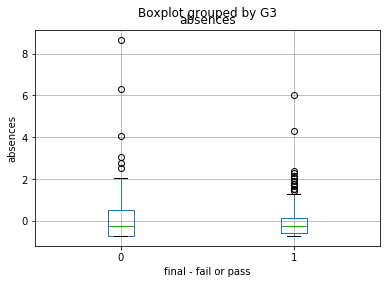

In [22]:
# boxplot of absences
 
df_prep[['absences','G3']].boxplot(by='G3')
plt.ylabel('absences')
plt.xlabel('final - fail or pass')
#plt.savefig('figures/boxplot.png',dpi=300)
plt.show()

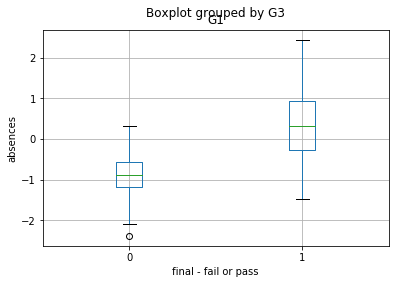

In [23]:
df_prep[['G1','G3']].boxplot(by='G3')
plt.ylabel('absences')
plt.xlabel('final - fail or pass')
#plt.savefig('figures/boxplot.png',dpi=300)
plt.show()

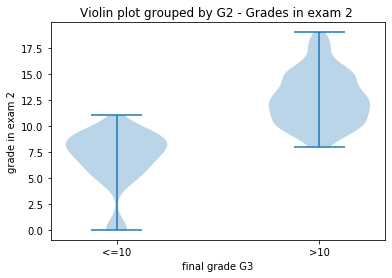

In [24]:
#violin plot g1
dataset = [df_orig[df_prep['G3']==0]['G2'].values,
           df_orig[df_prep['G3']==1]['G2'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2],['<=10','>10'])
plt.title('Violin plot grouped by G2 - Grades in exam 2 ')
plt.ylabel('grade in exam 2')
plt.xlabel('final grade G3')
plt.savefig('figures/violin.png',dpi=300)
plt.show()

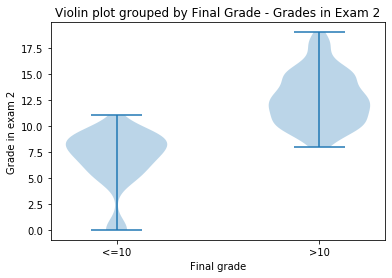

In [32]:
#violin plot g2
dataset = [df_orig[df_prep['G3']==0]['G2'].values,
           df_orig[df_prep['G3']==1]['G2'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2],['<=10','>10'])
plt.ylabel('Grade in exam 2')
plt.xlabel('Final grade')
plt.title('Violin plot grouped by Final Grade - Grades in Exam 2')
plt.savefig('figures/figuresG2vplot.png',dpi=300)
plt.show()

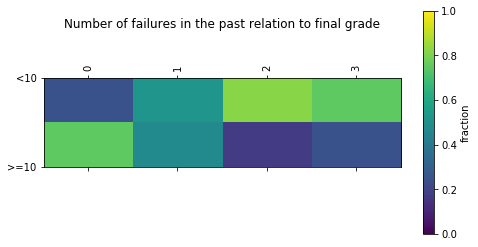

In [33]:
#matshow of failures
import numpy as np
count_matrix = df_orig.groupby(['failures','G3']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)


count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
#print(count_matrix_norm)

## plt.matshow()
plt.matshow(count_matrix_norm.T,vmin=0,vmax=1)
plt.xticks(np.arange(count_matrix_norm.shape[0]),count_matrix_norm.index,rotation=90)
plt.yticks(np.arange(count_matrix_norm.shape[1]),count_matrix_norm.columns)
plt.colorbar(label='fraction')
plt.title('Number of failures in the past relation to final grade', y=1.5)
plt.savefig('figures/G2vplot.png',dpi=300)
plt.show()


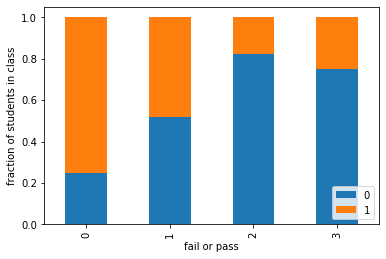

In [34]:
count_matrix = df_prep.groupby(['failures','G3']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('fraction of students in class')
plt.xlabel('fail or pass')

plt.legend(loc=4)
        
#plt.savefig('figures/stacked_bar.png',dpi=300)
plt.show()


Index(['G3', 'G2', 'G1', 'higher_yes', 'Medu', 'Fedu', 'schoolsup_no',
       'romantic_no', 'paid_yes', 'Mjob_health'],
      dtype='object')


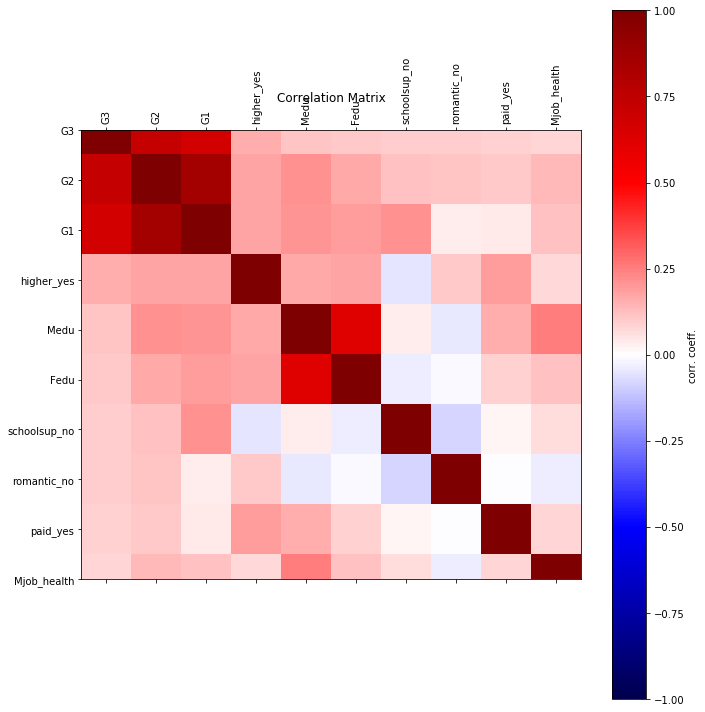

,0
0,G3
1,G2
2,G1
3,higher_yes
4,Medu
5,Fedu
6,schoolsup_no
7,romantic_no
8,paid_yes
9,Mjob_health


In [35]:
#correlation matrix of different features
corrmat = df_prep.corr()
all_cols = corrmat.sort_values('G3',ascending=False)['G3'].index 
cols = all_cols[:10] # positively correlated features

#cols = ['SalePrice']+[col for col in all_cols if '_nan' not in col][:-31:-1] 
cm = corrmat.loc[cols,cols]
print(cols)

plt.figure(figsize=(10,10))
plt.matshow(cm,vmin=-1,vmax=1,cmap='seismic',fignum=0)
plt.title('Correlation Matrix')
plt.colorbar(label='corr. coeff.')
plt.xticks(np.arange(cm.shape[0]),list(cols),rotation=90)
plt.yticks(np.arange(cm.shape[0]),list(cols))
plt.tight_layout()

plt.savefig('figures/corr_coeff_dummies.png',dpi=300)
plt.show()
df_correlation=pd.DataFrame(cols)
df_correlation

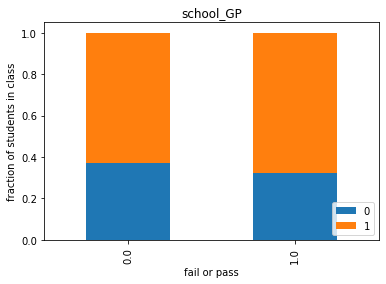

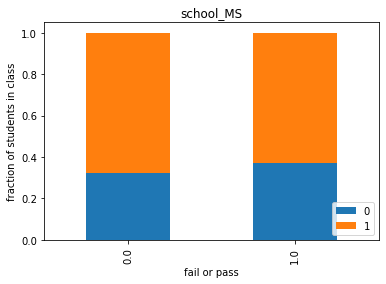

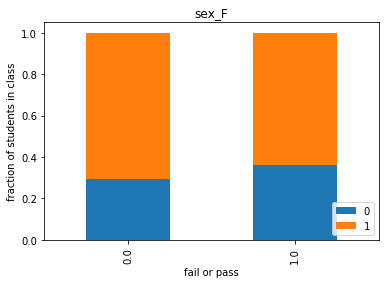

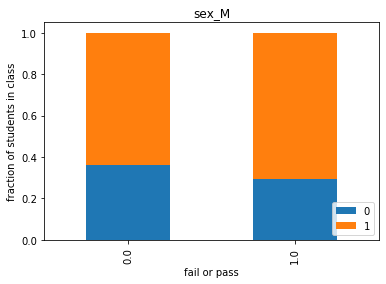

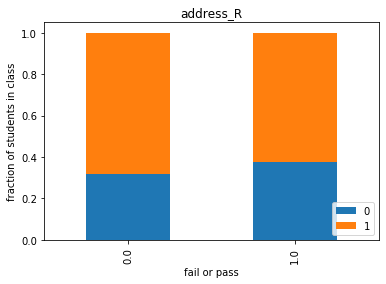

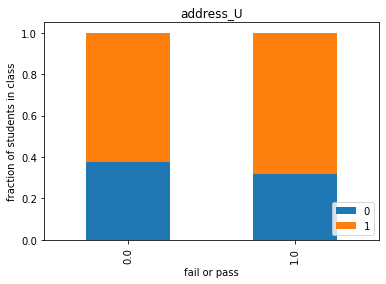

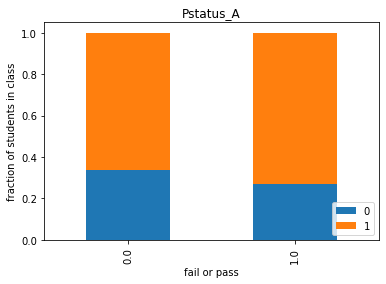

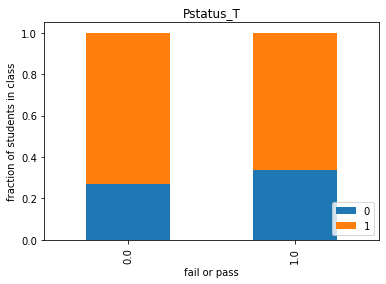

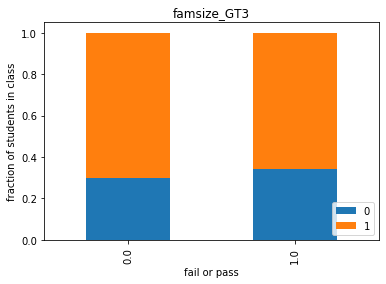

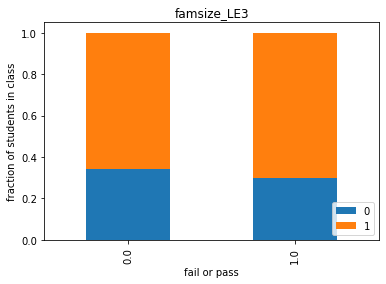

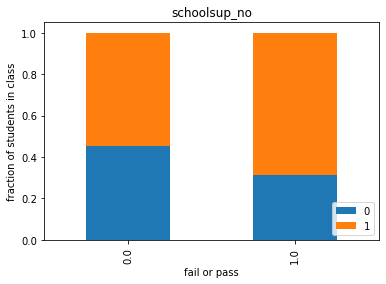

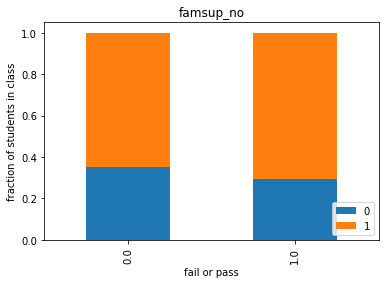

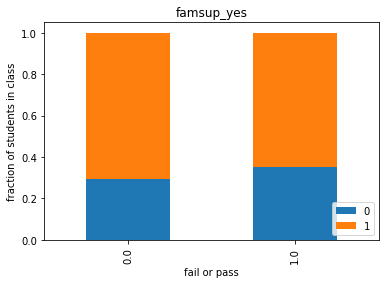

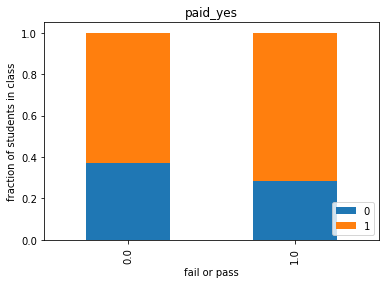

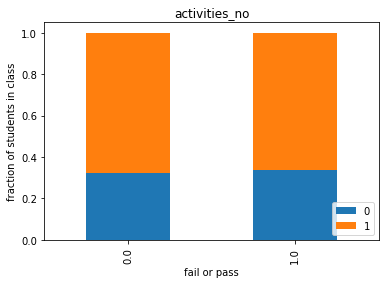

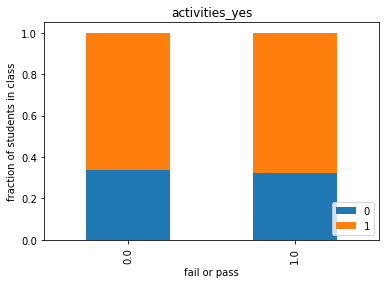

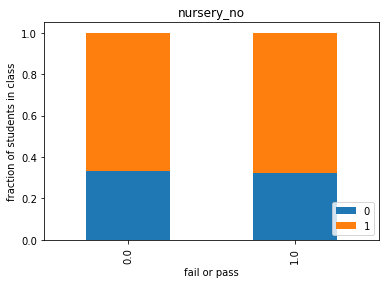

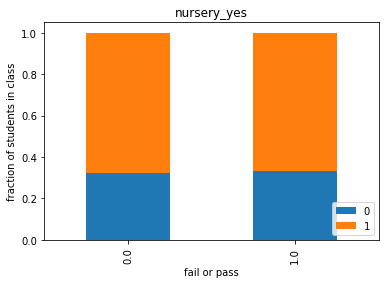

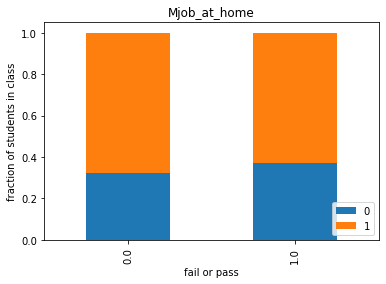

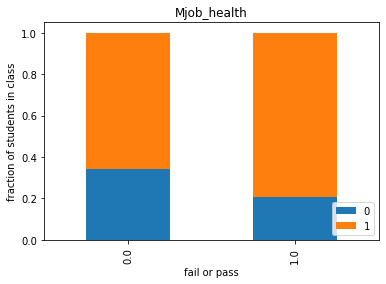

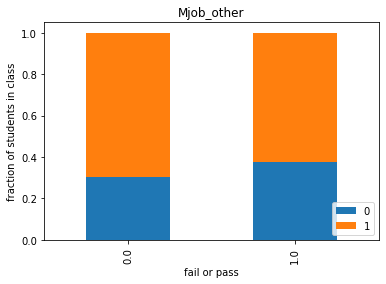

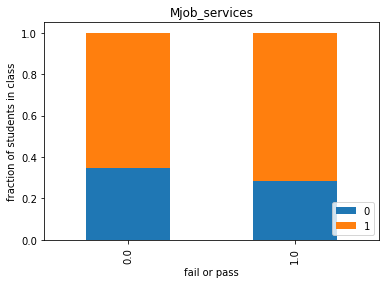

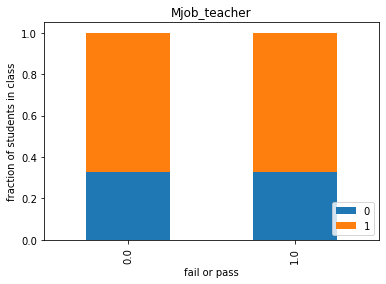

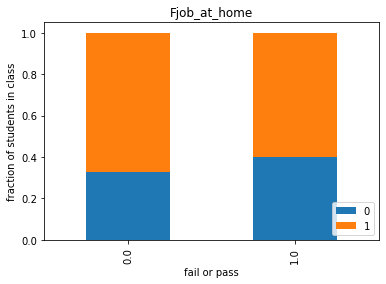

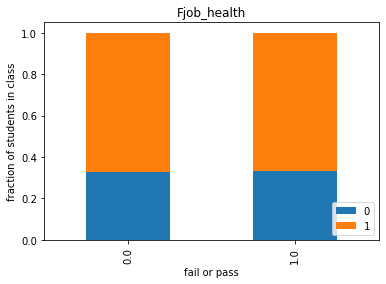

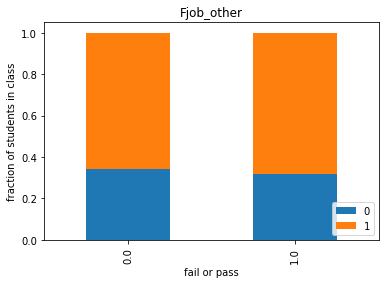

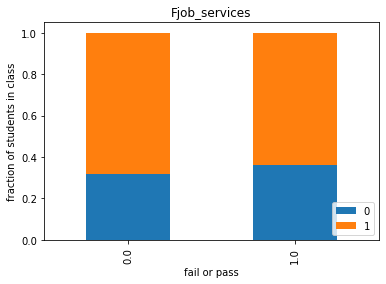

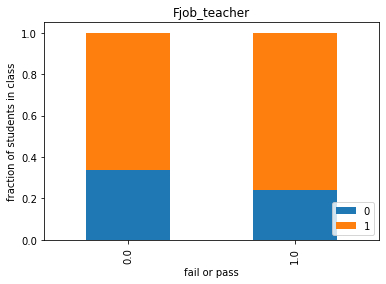

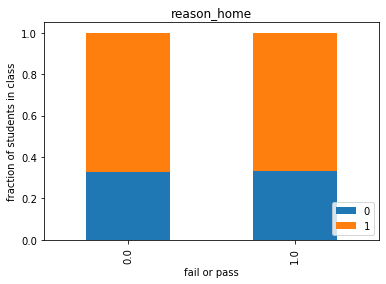

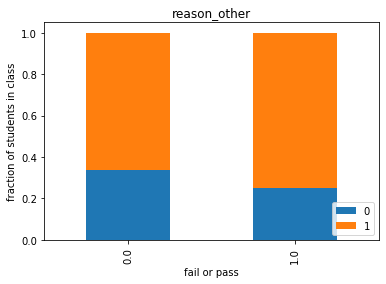

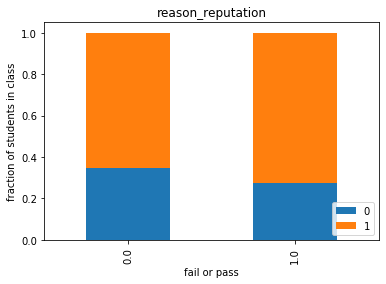

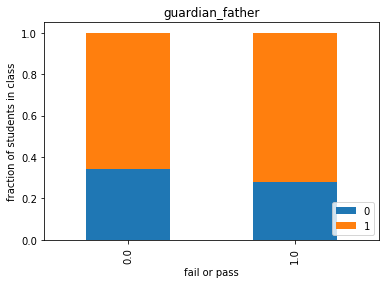

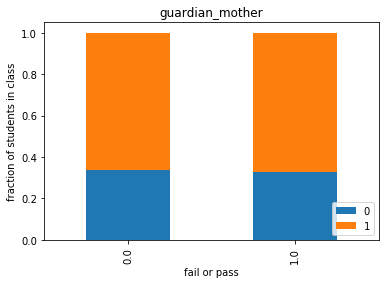

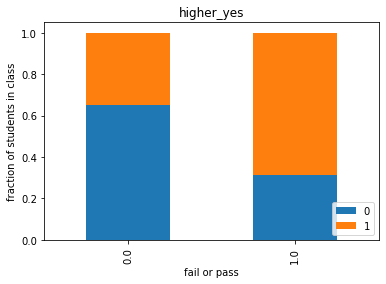

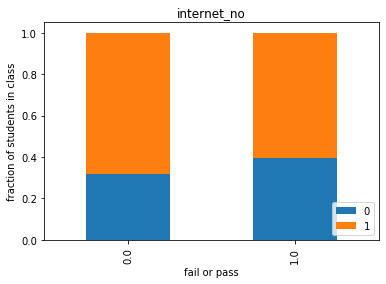

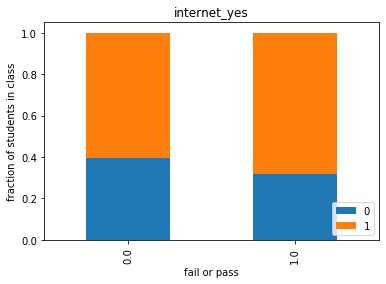

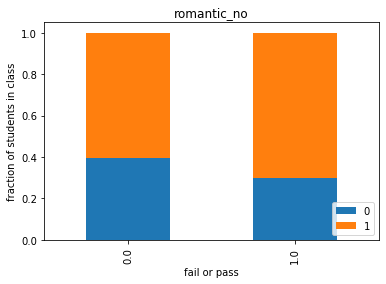

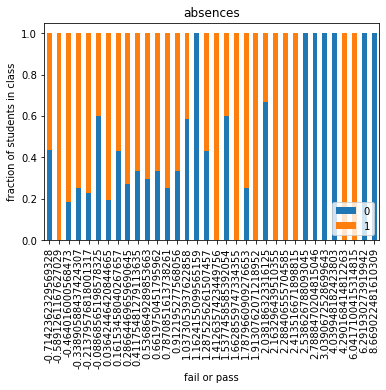

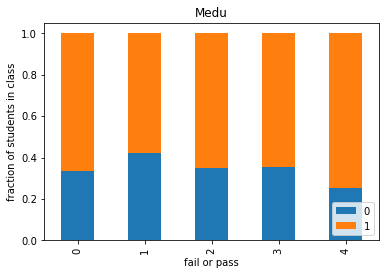

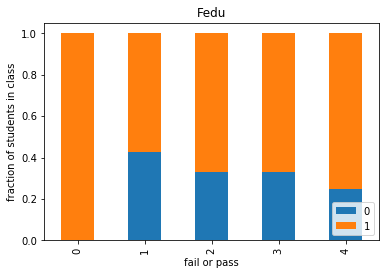

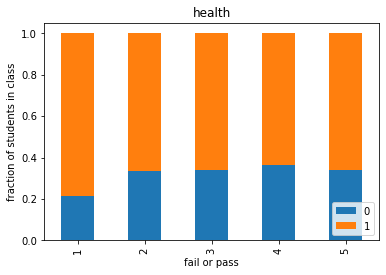

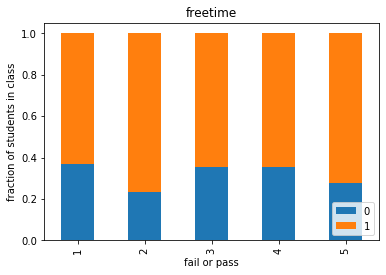

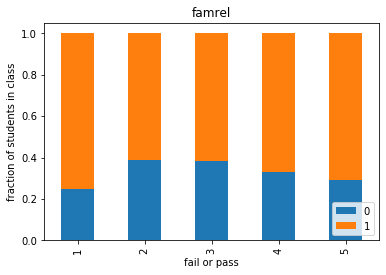

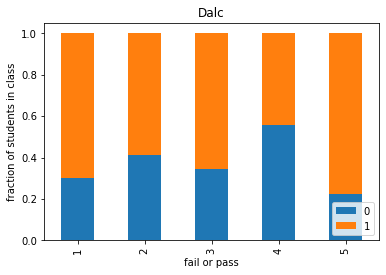

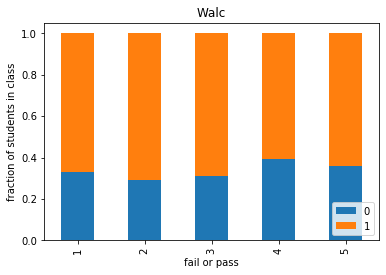

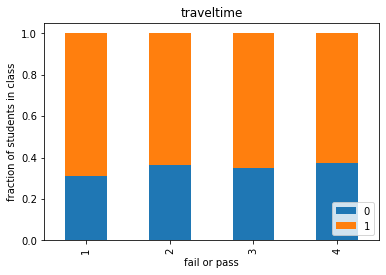

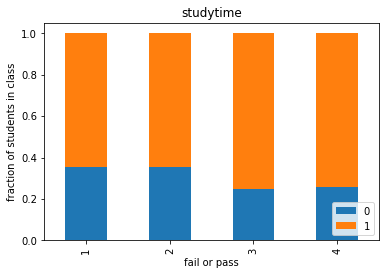

In [36]:
#plot mat show of imp features?
boxplot = ['higher_yes','Medu', 'Fedu', 'schoolsup_no',
       'romantic_no', 'paid_yes', 'Mjob_health', 'studytime', 'sex_M',
       'reason_reputation', 'internet_yes', 'Mjob_services', 'guardian_father',
       'famsup_no', 'reason_other', 'Fjob_teacher', 'address_U']  #x14 wants higher education 
box = ['higher_yes', 'Medu', 'Fedu', 'schoolsup_no',
       'romantic_no', 'paid_yes', 'Mjob_health', 'studytime', 'sex_M',
       'reason_reputation', 'internet_yes', 'Mjob_services', 'guardian_father',
        'famsup_no', 'reason_other', 'Fjob_teacher', 'address_U', 'famrel',
       'Pstatus_A', 'famsize_LE3', 'school_GP', 'Fjob_other', 'activities_yes', 
        'guardian_mother', 'nursery_no', 'Mjob_teacher', 'reason_home',
        'Fjob_health', 'nursery_yes', 'activities_no', 'freetime', 'Walc',
        'school_MS', 'Fjob_at_home', 'Mjob_at_home', 'Fjob_services',
        'famsize_GT3', 'Pstatus_T', 'traveltime', 'address_R', 'Dalc',
       'famsup_yes', 'internet_no', 'health', 'sex_F', 'Mjob_other',
        'absences']
for item in df_prep:
    if item in box:
       # df_prep[['G3',item]].boxplot(by=item)
       # plt.ylabel('Final Grade')
       # plt.xlabel(item)
       # plt.show() 
        
       # count_matrix = df_prep.groupby([item,'G3']).size().unstack()
#print(count_matrix)
      #  count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
#print(count_matrix_norm)
#stacked bar plot of people who wanna pursue higher education
        count_matrix = df_prep.groupby([item,'G3']).size().unstack()
        count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
        count_matrix_norm.plot(kind='bar', stacked=True)
        plt.ylabel('fraction of students in class')
        plt.xlabel('fail or pass')
        plt.title(item)
        plt.legend(loc=4)
        
#plt.savefig('figures/stacked_bar.png',dpi=300)
        plt.show()

        

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


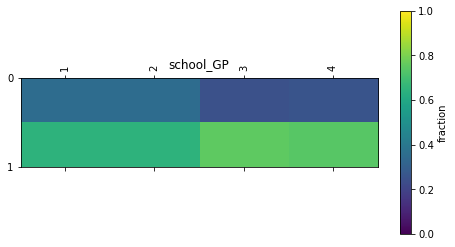

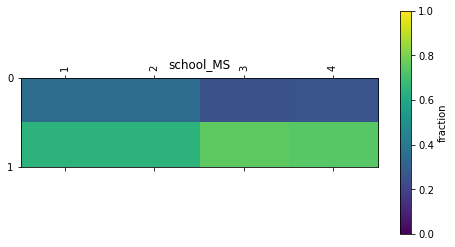

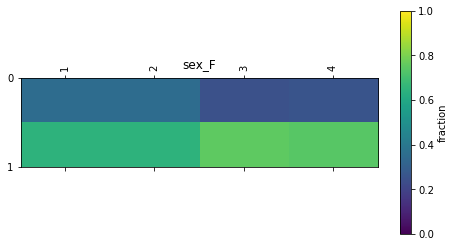

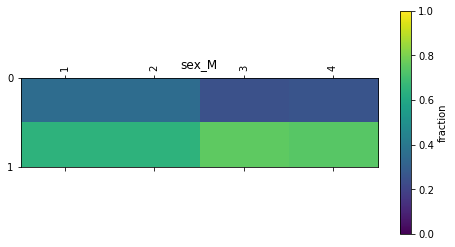

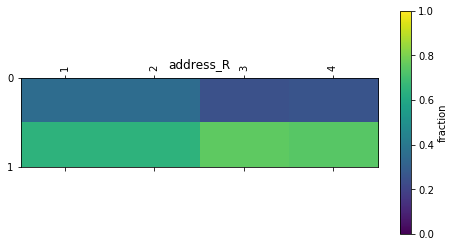

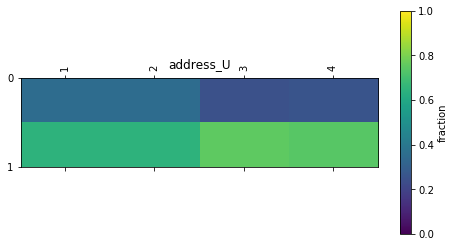

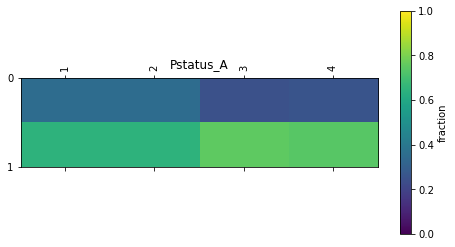

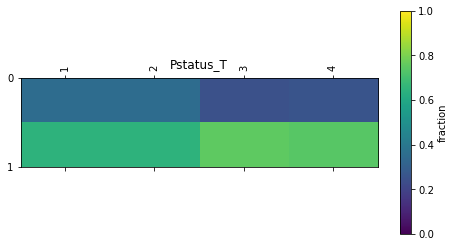

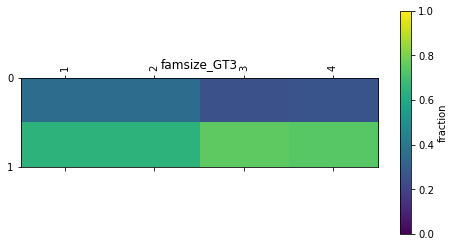

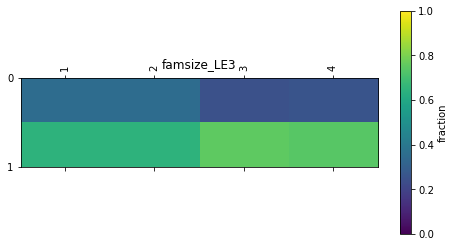

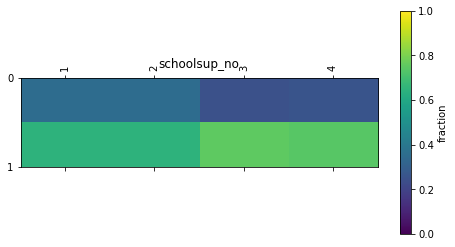

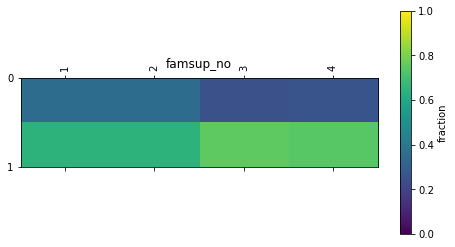

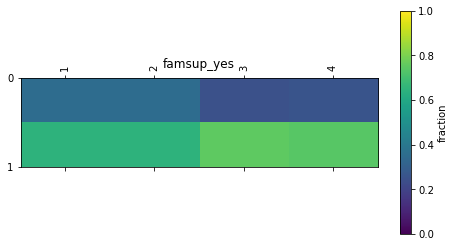

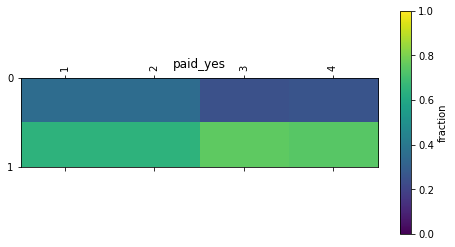

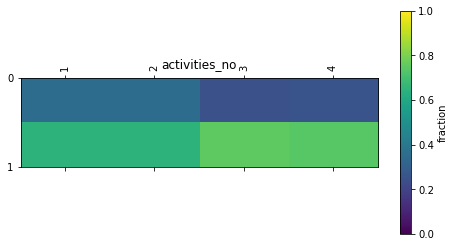

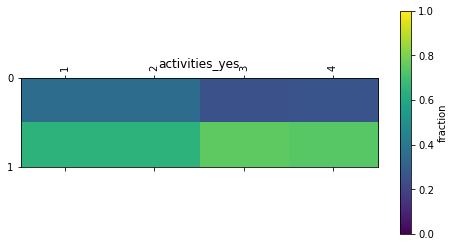

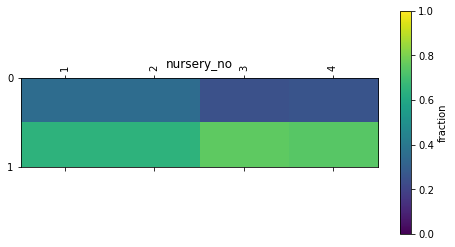

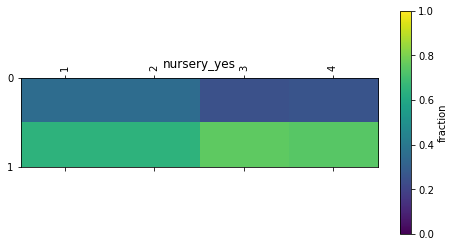

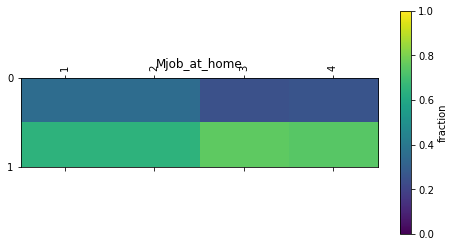

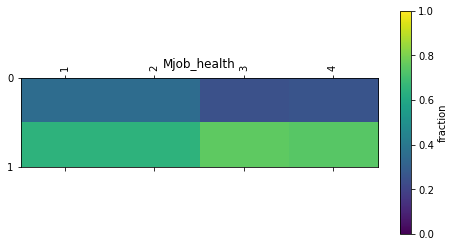

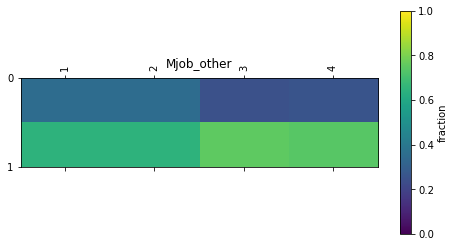

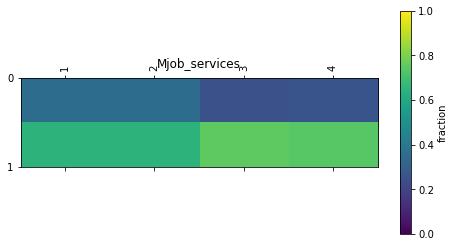

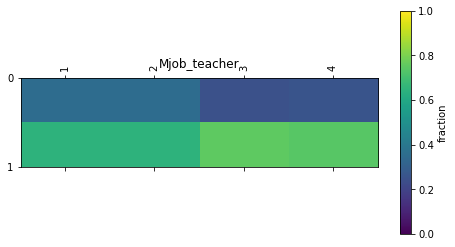

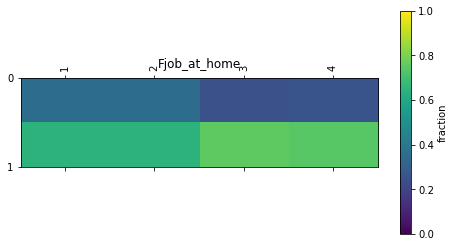

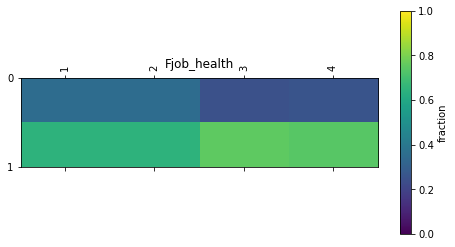

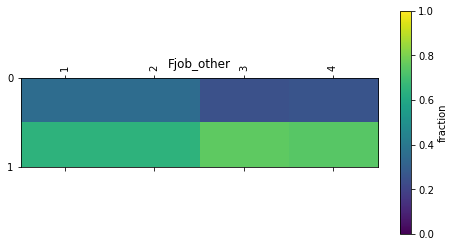

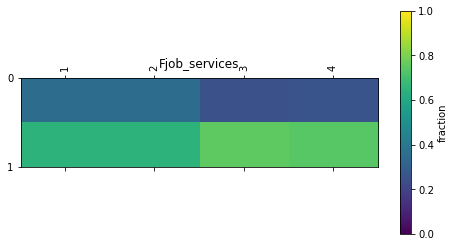

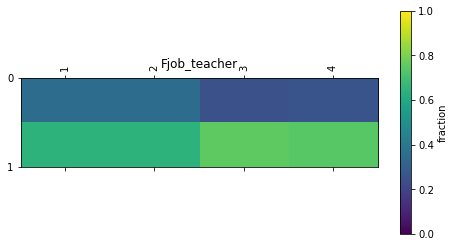

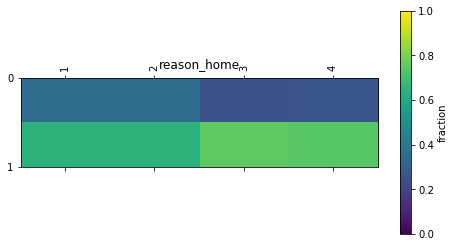

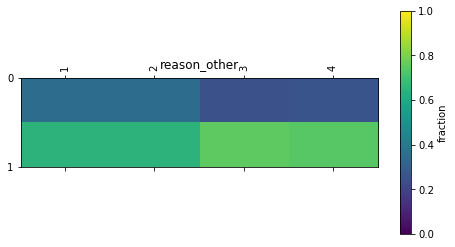

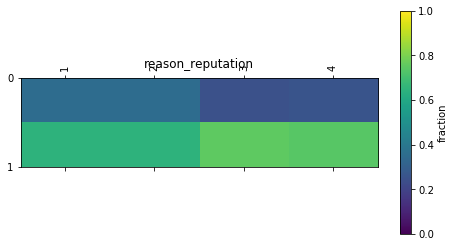

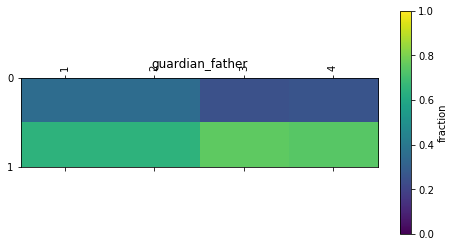

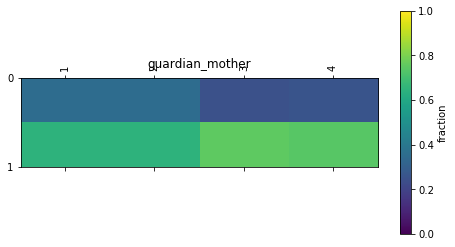

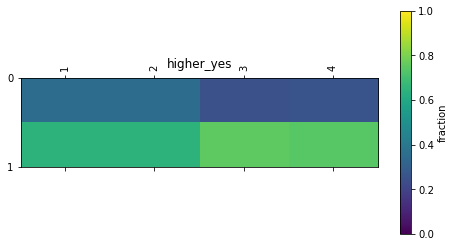

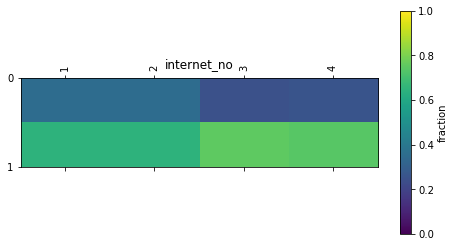

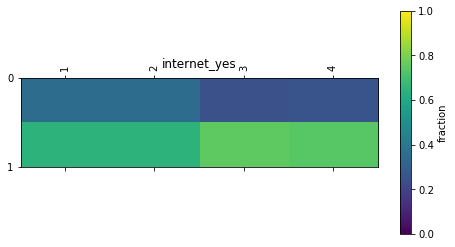

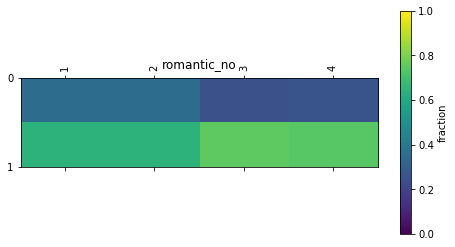

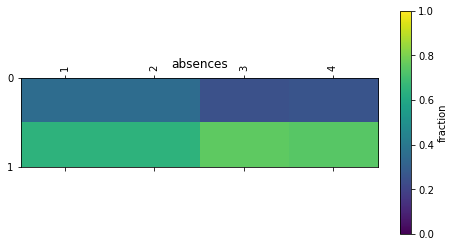

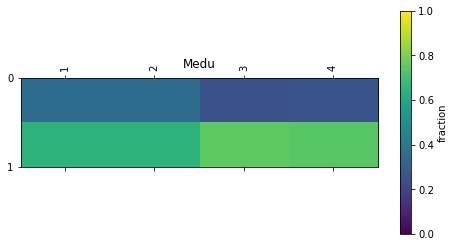

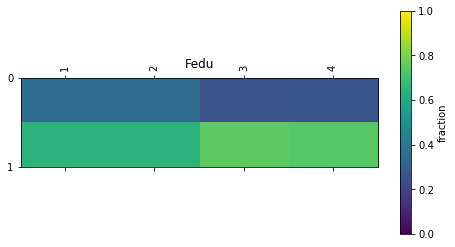

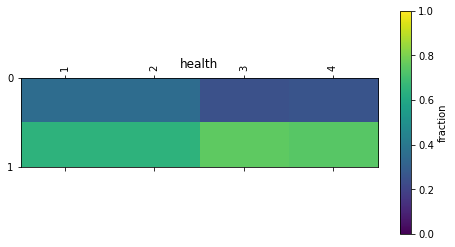

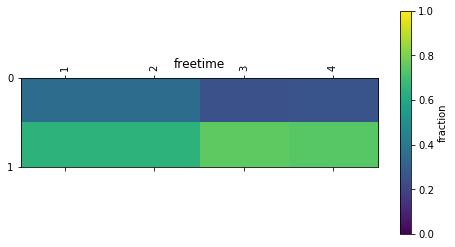

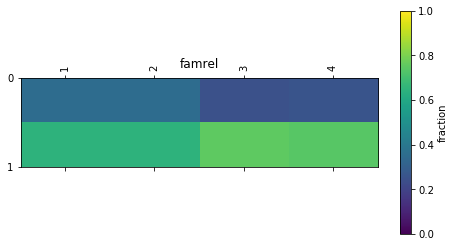

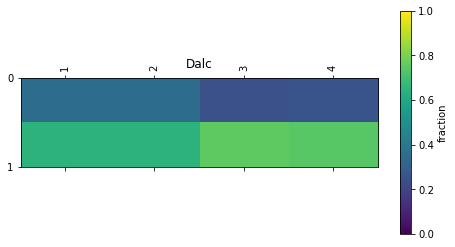

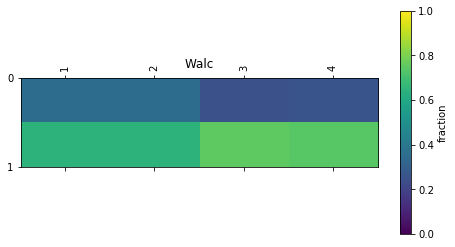

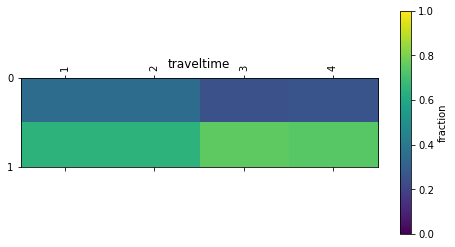

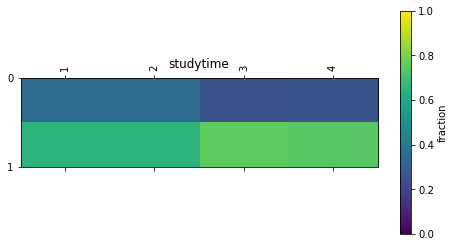

In [37]:
for item in df_prep:
    if item in box:
       # df_prep[['G3',item]].boxplot(by=item)
       # plt.ylabel('Final Grade')
       # plt.xlabel(item)
       # plt.show() 
        
       # count_matrix = df_prep.groupby([item,'G3']).size().unstack()
#print(count_matrix)
      #  count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
#print(count_matrix_norm)
#stacked bar plot of people who wanna pursue higher education
## plt.matshow()
        plt.matshow(count_matrix_norm.T,vmin=0,vmax=1)
        plt.xticks(np.arange(count_matrix_norm.shape[0]),count_matrix_norm.index,rotation=90)
        plt.yticks(np.arange(count_matrix_norm.shape[1]),count_matrix_norm.columns)
        plt.colorbar(label='fraction')
        plt.title(item)
        plt.tight_layout()
        plt.show()

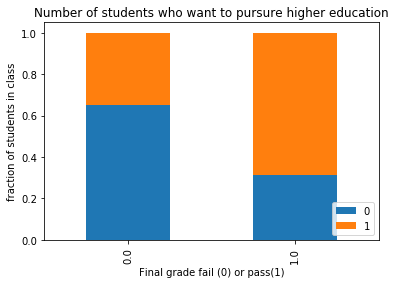

In [38]:
#stacked bar plot of people who wanna pursue higher education
count_matrix = df_prep.groupby(['higher_yes','G3']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)

count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('fraction of students in class')
plt.xlabel('Final grade fail (0) or pass(1)')
plt.title('Number of students who want to pursure higher education')
plt.legend(loc=4)
plt.savefig('figures/stacked_bar_higher e.png',dpi=300, bbox_inches = "tight")
plt.show()

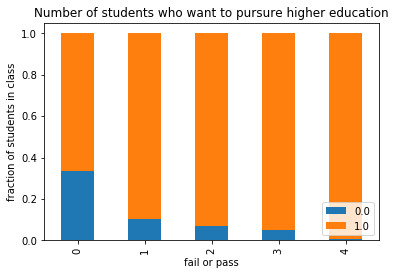

In [39]:
#stacked bar plot of people who wanna pursue higher education
count_matrix = df_prep.groupby(['Medu','higher_yes']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)

count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('fraction of students in class')
plt.xlabel('fail or pass')
plt.title('Number of students who want to pursure higher education')
plt.legend(loc=4)
#plt.savefig('figures/stacked_bar.png',dpi=300)
plt.show()

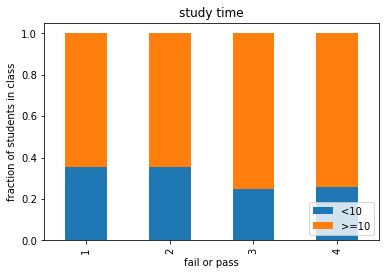

In [40]:
#stacked bar plot --- change bar plot axis label -- study time of students
count_matrix = df_orig.groupby(['studytime','G3']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)

count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('fraction of students in class')
plt.xlabel('fail or pass')
plt.title('study time')
plt.legend(loc=4)
#plt.savefig('figures/stacked_bar.png',dpi=300)
plt.show()

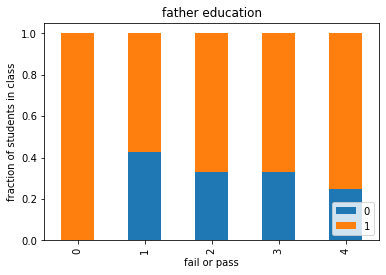

In [41]:
#stacked bar plot of people who wanna pursue higher education -- whats going on here? ??? 
count_matrix = df_prep.groupby(['Fedu','G3']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)

count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('fraction of students in class')
plt.xlabel('fail or pass')
plt.title('father education')
plt.legend(loc=4)
#plt.savefig('figures/stacked_bar.png',dpi=300)
plt.show()

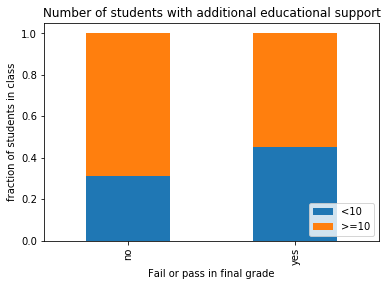

In [42]:
#stacked bar plot of people who wanna pursue higher education -- whats going on here? ??? 
count_matrix = df_orig.groupby(['schoolsup','G3']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)

count_matrix_norm.plot(kind='bar', stacked=True)

plt.ylabel('fraction of students in class')
plt.xlabel('Fail or pass in final grade')
plt.title('Number of students with additional educational support')
plt.legend(loc=4)
plt.savefig('figures/stacked_bar_additional educ .png',dpi=300, bbox_inches = "tight")
plt.show()